In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
#Cette ligne de code utilise la bibliothèque Keras pour charger le jeu de données MNIST.MNIST est un ensemble de données largement utilisé dans le domaine de l'apprentissage automatique et de la vision par ordinateur, composé d'images de chiffres écrits à la main.

In [41]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [42]:
len(X_train)

60000

In [11]:
# the shape of the image (28,28) : 28 by 28 pixels image

In [43]:
X_train[0].shape

(28, 28)

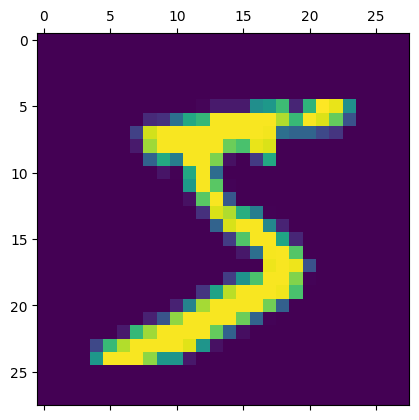

In [44]:
plt.matshow(X_train[0])

In [45]:
y_train[0]

5

In [26]:
# scalling is a technique that improves the machine learning model

In [46]:
#X_train = X_train / 255
#X_test = X_test / 255

In [47]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [31]:
# flattern the (28,28) grid of the image into a simple array 

In [48]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [18]:
# Dense means every one neurone in one layer is connect to every other neurone in the second layer

In [49]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)b

Epoch 1/5
1875/1875 [==============================] - 2s 853us/step - loss: 9.6710 - accuracy: 0.8401
Epoch 2/5
1875/1875 [==============================] - 1s 770us/step - loss: 6.1009 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 2s 819us/step - loss: 5.6779 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 1s 792us/step - loss: 5.5224 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 1s 750us/step - loss: 5.4125 - accuracy: 0.8856


In [50]:
# evaluate the accuracy on a test dataset

In [51]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 706us/step - loss: 5.7789 - accuracy: 0.8845


[5.778903484344482, 0.8845000267028809]

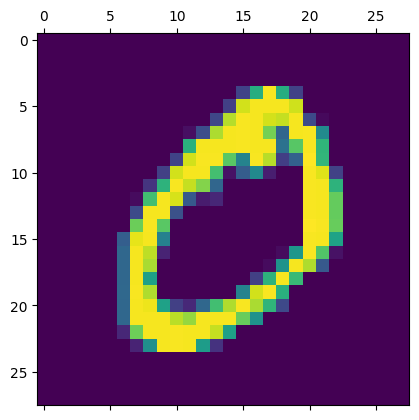

In [53]:
plt.matshow(X_train[1])

In [59]:
# the array has 10 cases representing the number from 0 to 9 and the percentage of each one 

In [56]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 695us/step


array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [58]:
# argmax gives me the number of the case that has the maximum value

In [57]:
np.argmax(y_predicted[1])

0

In [60]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 0]

In [61]:
# confusion matrix

In [62]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    3,    1,    0,    1,    0,    0,    0],
       [   5, 1124,    3,    2,    1,    0,    0,    0,    0,    0],
       [ 172,  315,  531,    6,    8,    0,    0,    0,    0,    0],
       [  81,  183,  489,  257,    0,    0,    0,    0,    0,    0],
       [  78,   23,   73,  270,  537,    0,    1,    0,    0,    0],
       [ 106,   23,  134,  461,   71,   95,    2,    0,    0,    0],
       [ 167,   41,  555,   43,   38,   41,   73,    0,    0,    0],
       [  49,   31,  156,  748,   23,    4,    0,   17,    0,    0],
       [  33,  144,  372,  327,   31,   59,    2,    0,    6,    0],
       [  33,   24,   34,  688,  205,    4,    0,   13,    5,    3]])>

In [65]:
# cofusion matrix to see all the errors and how they are distributed

Text(95.72222222222221, 0.5, 'Truth')

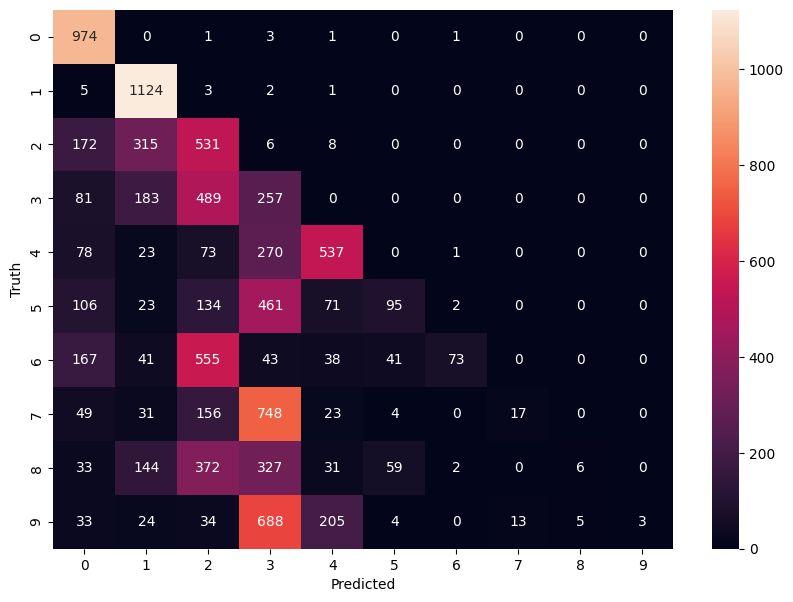

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
# add a hidden layer of 100 neurones

In [69]:
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.5491 - accuracy: 0.8371
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4125 - accuracy: 0.8965
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3124 - accuracy: 0.9184
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2623 - accuracy: 0.9320
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9376


In [70]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2602 - accuracy: 0.9360


[0.2602485716342926, 0.9359999895095825]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

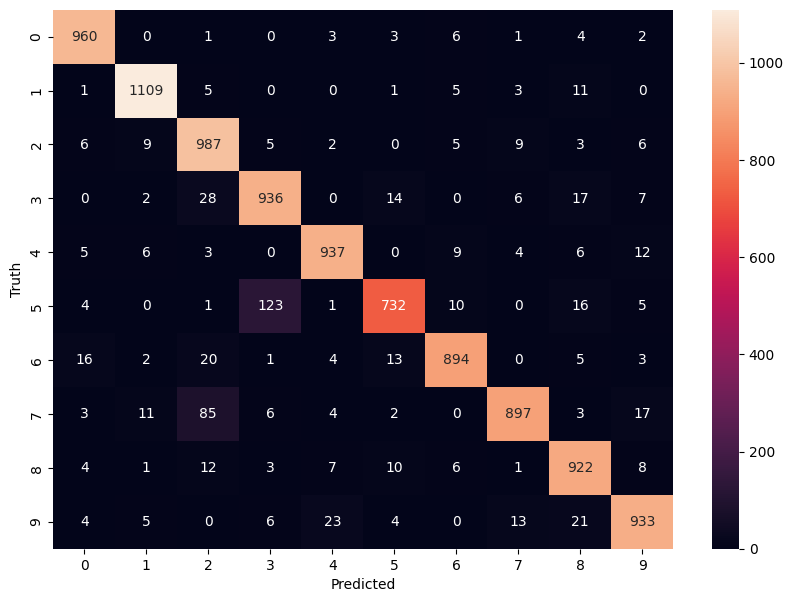

In [72]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1473 - accuracy: 0.8365
Epoch 2/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.3969 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 2s 923us/step - loss: 0.2919 - accuracy: 0.9236
Epoch 4/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.2384 - accuracy: 0.9385
Epoch 5/5
1875/1875 [==============================] - 2s 935us/step - loss: 0.2283 - accuracy: 0.9417
